# Optimizing Bankruptcy Prediction with K-NN, SMOTE, and Logistic Regression

## Introduction:

### Project Background:

The possibility of a company facing bankruptcy is a major concern in the economic and financial field. Predicting bankruptcy early can reduce risks and provide stakeholders with valuable information to make informed decisions. The project aims to leverage machine learning techniques to predict the probability of bankruptcy based on financial metrics. We particularly address the challenges posed by unbalanced datasets, which are common in bankruptcy prediction scenarios where the number of solvent companies far exceeds the number of insolvent companies.

### Main Question:

Can we accurately predict the likelihood of a company facing bankruptcy by applying SMOTE for data balancing, KNN for classification, and logistic regression for identifying key financial indicators?

### Dataset Description:

The dataset chosen for this project is from Kaggle (https://www.kaggle.com/datasets/utkarshx27/american-companies-bankruptcy-prediction-dataset/data), which comprises various financial indicators of American public companies listed on the New York Stock Exchange and NASDAQ over a period. It includes features such as current assets, market value, inventorys, depreciation and amortization etc. The target variable is binary, indicating whether a company went bankrupt or remained solvent within the time frame studied.

## Preliminary Exploratory Data Analysis:

### Read the dataset from internet:

First, we intall and load the ***tidyverse*** library we're going to use to read the dataset:

In [1]:
install.packages("tidyverse")
install.packages("tidymodels")
library(tidyverse)
library(tidymodels)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ 

Then we will download the dataset from our github repository (https://raw.githubusercontent.com/4ugenstern/DSCI-100-GroupProject/main/american_bankruptcy.csv):

In [2]:
url = "https://raw.githubusercontent.com/4ugenstern/DSCI-100-GroupProject/main/american_bankruptcy.csv"
download.file(url, "data.csv")

raw_data <- read_csv("data.csv")

head(raw_data)

bank_split <- initial_split(raw_data, prop = 0.75, strata = status_label)  
bank_train <- training(bank_split)   
bank_test <- testing(bank_split)

Rows: 78682 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): company_name, status_label
dbl (19): year, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,⋯,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,⋯,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,⋯,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,⋯,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,⋯,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,⋯,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
C_1,alive,2004,474.542,598.172,27.950,61.774,255.477,15.453,127.121,⋯,747.848,732.230,227.159,33.824,149.676,160.025,142.450,747.848,417.486,686.074


### Clean and wrangle the dataset:

### Target Column Distribution:

In [3]:
alive <- filter(bank_train, status_label == "alive")
total_number <- nrow(bank_train)
alive_number <- nrow(alive)
failed_number <- total_number - alive_number

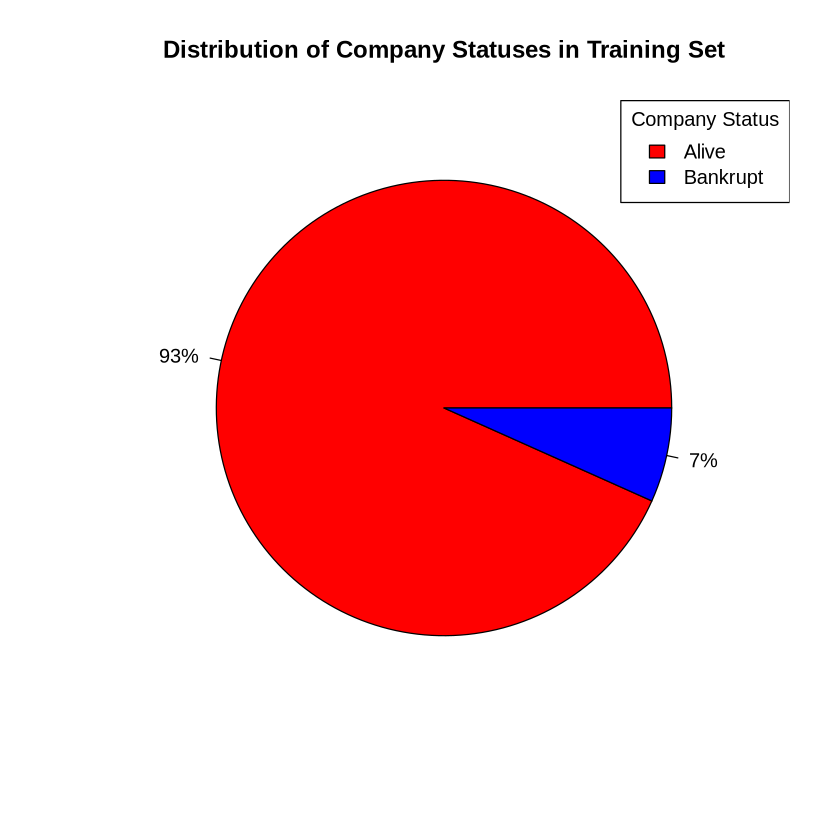

In [4]:
pie_data <- c(alive_number, failed_number)
pie_labels <- c("Alive", "Bankrupt")
status_label <- c("Alive", "Bankrupt")
slice_colors <- c("red", "blue")

pie(pie_data, labels = percent(pie_data / sum(pie_data)), col = slice_colors, main = "Distribution of Company Statuses in Training Set")

legend("topright",
    legend = status_label,
    fill = slice_colors,
    title = "Company Status")

## Expected Outcomes and Significance 

### What we expect to find:

We expect to find the probability that a certain company goes bankrupt based on definitive factors.

### Impact of the findings: 

These findings can be beneficial to potential business owners who wish to know how successful other businesses in the same fields as them are. They can also be useful to current business owners as this model can help predicting whether their business is headed towards bankruptcy or not.